# i. Problem Topic

**Background**

Climate change is an urgent global challenge. To address it, the transition from fossil fuels to clean and renewable energy sources is crucial. Access to energy, especially electricity, is fundamental to social and economic development.

**Problem Identification**

Using the SMART Framework:
* S: Want to identify the level of electricity generated in several countries, to get a clear picture of how much CO2 emissions are produced by those countries
* M: Calculation of the level of electricity generated and the level of CO2 emissions in a country
* A: Conduct data analysis on Access to electricity, GDP per capita, Electricity from fossil fuels, Electricity from nuclear, Electricity from renewables, Value CO2 Emission, and clean energy production produced by developing and developed countries
* R: Focus identification on the level of electricity and population welfare
* T: The results of this analysis will be completed within 1 week

**Problem Statement:**

Can identify data on the level of electricity and the level of CO2 emissions in a country, to provide an overview of the amount of energy and the level of CO2 emissions produced by the country by analyzing data within 1 week

**Breaking Down the Problem**
1. Which countries are the top 5 electricity producers from fossil fuels, nuclear, and renewable energy in the last 5 years?
2. How do the levels of CO2 emissions produced by fossil fuel, nuclear, and renewable electricity from the top 5 electricity producing countries compare in the last 5 years?
3. How does financial assistance from developed countries to developing countries affect the development of clean energy in the last 5 years?
4. What is the relationship between electricity access and the welfare of the population in the country in question in the last 5 years?
5. Is there a difference between clean energy production from developed countries and clean energy production from developing countries in the last 5 years?

# ii. Data Loading

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro

**Loading Data Set**

In [4]:
df_fact = pd.read_csv("staging/df_fact.csv")
df_country = pd.read_csv("staging/df_country.csv")
df_country_economic = pd.read_csv("staging/df_country_economic.csv")

**Data Exploration**

In [5]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_name                3649 non-null   object 
 1   year                        3649 non-null   int64  
 2   access_electricity          3649 non-null   float64
 3   access_clean_fuels          3649 non-null   float64
 4   renewable_electricity       3649 non-null   float64
 5   financial_flows             3649 non-null   float64
 6   renewable_energy_share      3649 non-null   float64
 7   electricity_fossil_fuels    3649 non-null   float64
 8   electricity_nuclear         3649 non-null   float64
 9   electricity_renewables      3649 non-null   float64
 10  low_carbon_electricity      3649 non-null   float64
 11  primary_energy_consumption  3649 non-null   float64
 12  energy_intensity_level      3649 non-null   float64
 13  value_co2_emissions         3649 

In [6]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  176 non-null    object 
 1   density       176 non-null    float64
 2   land_area     176 non-null    float64
 3   latitude      176 non-null    float64
 4   longitude     176 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df_country_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    3649 non-null   object 
 1   year            3649 non-null   int64  
 2   gdp_growth      3649 non-null   float64
 3   gdp_per_capita  3649 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 114.2+ KB


**Modifying Data For Analytics Purpose**

In [9]:
# Merge tables
df_merged = df_fact.merge(df_country_economic, on=["country_name", "year"], how="left")
df_merged = df_merged.merge(df_country, on="country_name", how="left")
latest_gdp_data = df_country_economic.loc[df_country_economic.groupby("country_name")["year"].idxmax(), ["country_name", "gdp_per_capita"]]

# Create threshold for new column
threshold_gdp_per_capita = 12000

# Fill in the new column with the criteria that have been created
latest_gdp_data["country_classification"] = latest_gdp_data["gdp_per_capita"].apply(
    lambda x: "Developed Country" if x >= threshold_gdp_per_capita else "Developing Country"
)

# Create a new DataFrame
df_new = df_merged.merge(latest_gdp_data[["country_name", "country_classification"]], on="country_name", how="left")
df_new.head()

,country_name,year,access_electricity,access_clean_fuels,renewable_electricity,financial_flows,renewable_energy_share,electricity_fossil_fuels,electricity_nuclear,electricity_renewables,...,energy_intensity_level,value_co2_emissions,renewables,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude,country_classification
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,0.0,0.000000,0.000000,60.0,652230.0,33.93911,67.709953,Developing Country
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,0.0,0.000000,0.000000,60.0,652230.0,33.93911,67.709953,Developing Country
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,0.0,0.000000,179.426579,60.0,652230.0,33.93911,67.709953,Developing Country
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,0.0,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,Developing Country
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,1.20,1029.999971,0.0,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,Developing Country


# iii. Analytics

**EDA**

**Q1. Which countries are the top 5 electricity producers from fossil fuels, nuclear and renewable energy in the last 5 years?**

**TOP 5**

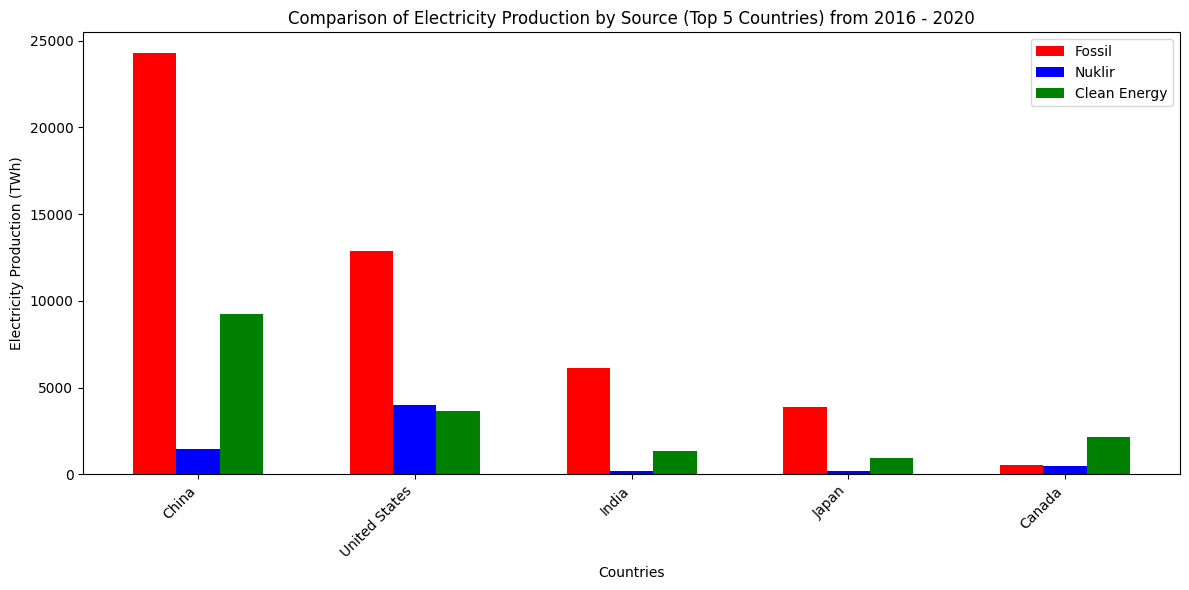

In [10]:
# Filter data for 2016 - 2020
years = [2016, 2017, 2018, 2019, 2020]
df_filtered = df_new[df_new['year'].isin(years)]

# Group data by country and sum electricity production
grouped_data = df_filtered.groupby('country_name')[['electricity_fossil_fuels', 'electricity_nuclear', 'electricity_renewables']].sum()

# Create labels for the x-axis
countries = grouped_data.index

# Determine the top 5 countries
top_5_countries_electricity = grouped_data.sum(axis=1).nlargest(5)

# Filter data for the top 5 countries
top_5_data = grouped_data.loc[top_5_countries_electricity.index]

# Create labels for the x-axis
countries = top_5_data.index

# Create a bar chart
x = range(len(countries)) # Create a position for each bar
width = 0.2

plt.figure(figsize=(12, 6)) # Set the size of the chart, adjust if necessary

plt.bar(x, top_5_data['electricity_fossil_fuels'], width, label='Fossil', color='red')
plt.bar([i + width for i in x], top_5_data['electricity_nuclear'], width, label='Nuklir', color='blue')
plt.bar([i + 2*width for i in x], top_5_data['electricity_renewables'], width, label='Clean Energy', color='green')

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Electricity Production (TWh)')
plt.title('Comparison of Electricity Production by Source (Top 5 Countries) from 2016 - 2020')
plt.xticks([i + width for i in x], countries, rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

**Insight**

The majority of the top 5 countries are still heavily dependent on fossil fuels (coal, oil, and gas) as their main source of electricity production. This can be seen from the red bars that dominate in each country (except Canada).

This is directly proportional to the data published on the worldometers website (https://www.worldometers.info/energy/), where China is the number 1 country with the largest energy consumption, followed by the United States, Russia, India, then Japan (the data set we have does not provide data for Russia).

**BOTTOM 5**

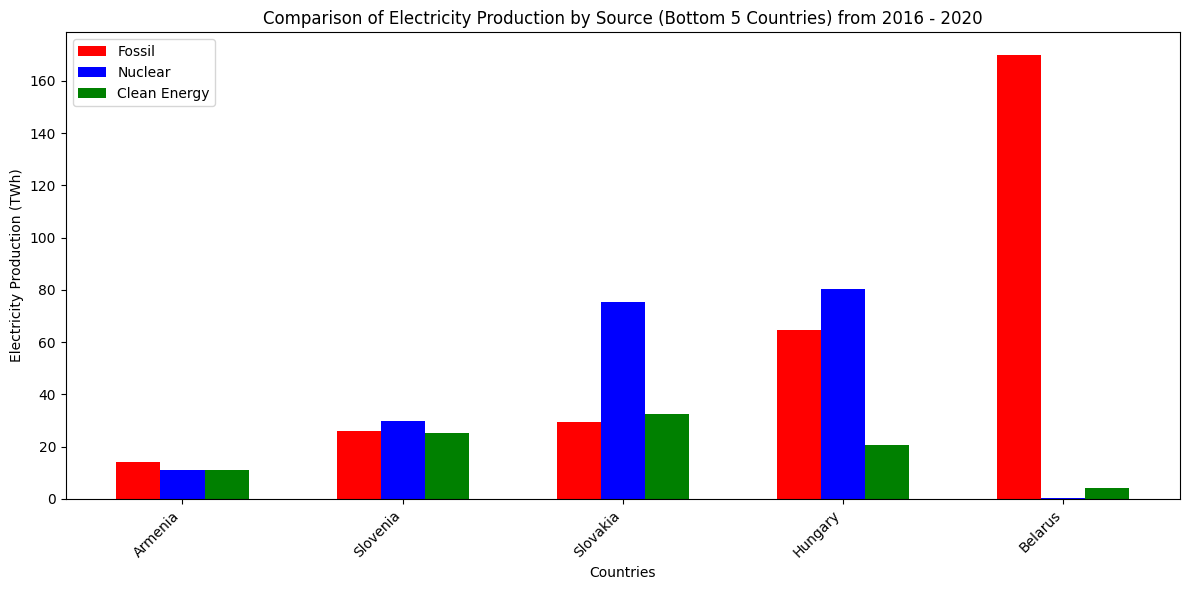

In [11]:
# Delete rows with value 0 in each category
grouped_data = grouped_data[(grouped_data['electricity_fossil_fuels'] > 0) &
(grouped_data['electricity_nuclear'] > 0) &
(grouped_data['electricity_renewables'] > 0)]

# Determine the bottom 5 countries
bottom_5_countries_electricity = grouped_data.sum(axis=1).nsmallest(5)

# Handle the case of less than 5 countries
num_countries = min(5, len(bottom_5_countries_electricity))
bottom_5_countries_electricity = bottom_5_countries_electricity.head(num_countries)

# Filter data for the bottom 5 countries
bottom_5_data = grouped_data.loc[bottom_5_countries_electricity.index]

# Create labels for the X axis
countries = bottom_5_data.index

# Create a bar chart
x = range(len(countries))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x, bottom_5_data['electricity_fossil_fuels'], width, label='Fossil', color='red')
plt.bar([i + width for i in x], bottom_5_data['electricity_nuclear'], width, label='Nuclear', color='blue')
plt.bar([i + 2*width for i in x], bottom_5_data['electricity_renewables'], width, label='Clean Energy', color='green')

plt.xlabel('Countries')
plt.ylabel('Electricity Production (TWh)')
plt.title('Comparison of Electricity Production by Source (Bottom 5 Countries) from 2016 - 2020')
plt.xticks([i + width for i in x], countries, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

**Insight**

The majority of the bottom 5 countries are still heavily dependent on fossil fuels (coal, oil, and gas) and nuclear as their main source of electricity production. This can be seen from the red and blue bars that dominate each country. The proportion of each energy source varies from country to country. This shows that each country has different energy and natural resource policies.

**Q2. How do the top 5 electricity producing countries compare the CO2 emission levels generated by fossil fuel, nuclear and renewable energy in the last 5 years?**

**Top 5**

C:\Users\nabil\AppData\Local\Temp\ipykernel_19864\4239982072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_electricity'] = df_filtered['electricity_fossil_fuels'] + df_filtered['electricity_nuclear'] + df_filtered['electricity_renewables']
C:\Users\nabil\AppData\Local\Temp\ipykernel_19864\4239982072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fossil_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_fossil_fuels'] / df_filtered['total_el

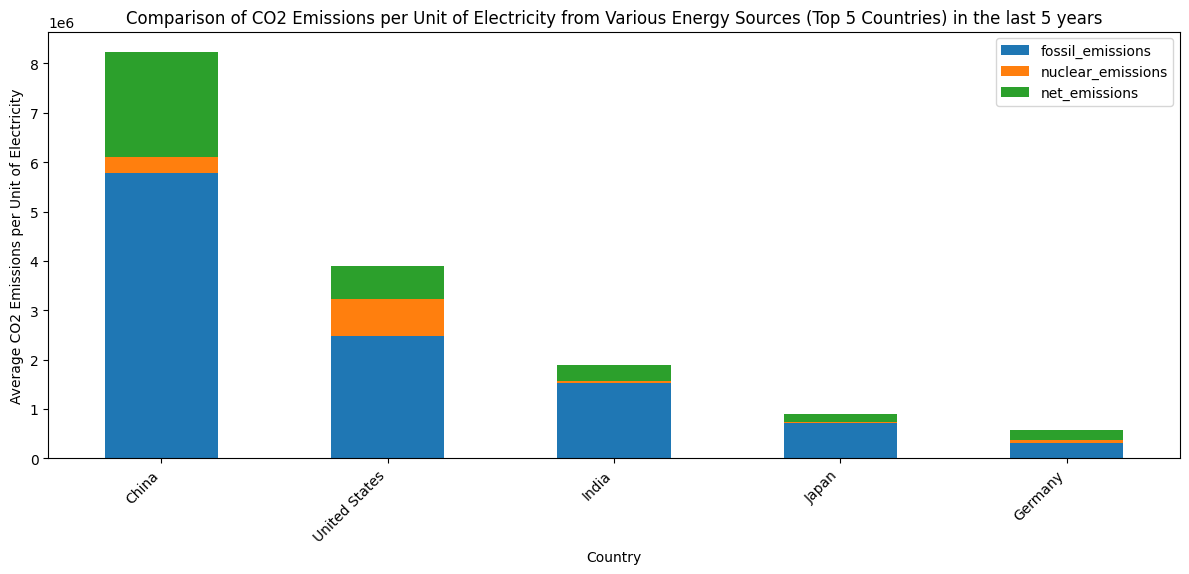

In [12]:
# Calculate Total Electricity Production:
df_filtered['total_electricity'] = df_filtered['electricity_fossil_fuels'] + df_filtered['electricity_nuclear'] + df_filtered['electricity_renewables']

# Calculate CO2 Emissions for Each Source:
df_filtered['fossil_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_fossil_fuels'] / df_filtered['total_electricity']
df_filtered['nuclear_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_nuclear'] / df_filtered['total_electricity']
df_filtered['net_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_renewables'] / df_filtered['total_electricity']

# Group Data by Country and Calculate Average Emissions :
emissions_per_country = df_filtered.groupby('country_name')[['fossil_emissions', 'nuclear_emissions', 'net_emissions']].mean()

# Sort by total emissions
emissions_per_country['total_emissions'] = emissions_per_country.sum(axis=1)
top_5_countries_emission = emissions_per_country.nlargest(5, 'total_emissions')

# Visualize Data in Bar Chart Form
top_5_countries_emission[['fossil_emissions', 'nuclear_emissions', 'net_emissions']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Comparison of CO2 Emissions per Unit of Electricity from Various Energy Sources (Top 5 Countries) in the last 5 years')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions per Unit of Electricity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Insight**

The bar chart clearly shows that the largest CO2 emissions from the top 5 countries come from the use of fossil fuels (fossil_emissions). This indicates that these countries are still very dependent on fossil fuel sources to meet their electricity needs.

The bar chart above is in accordance with data published on lintasenergi.id (https://transisienergi.id/data/emisi-co2-tahunan-negara-g20/), where the country that produces the largest CO2 emissions in the world is China, followed by the United States, India, Russia, and Japan (the data set we have does not provide data for Russia).

**Bottom 5**

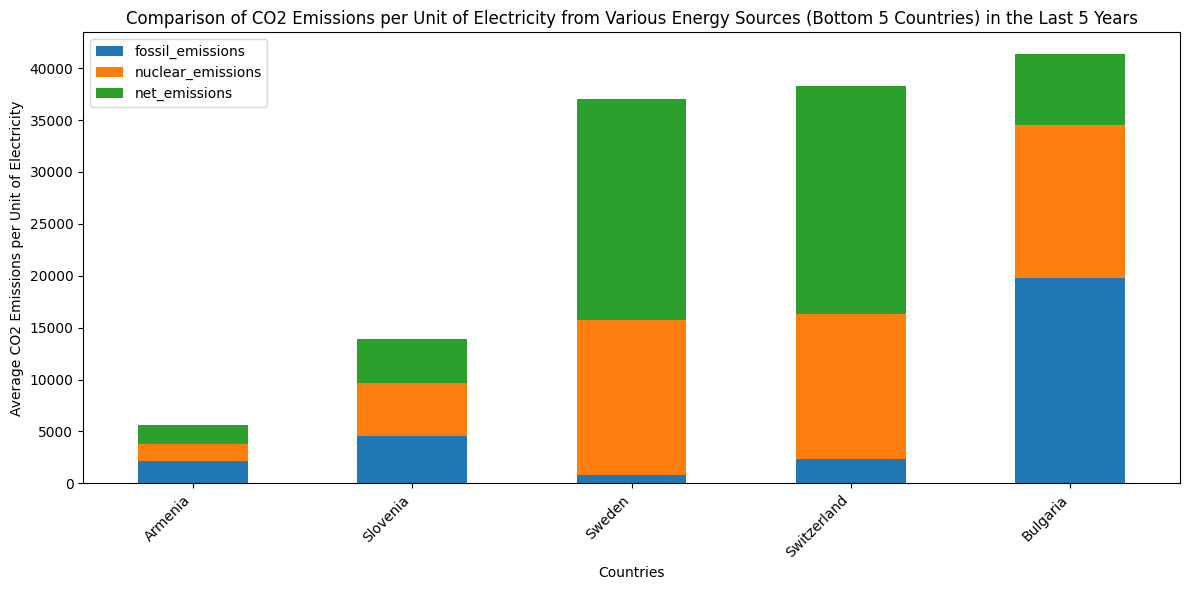

In [13]:
# Remove rows with value 0 in each category
df_filtered = df_filtered[(df_filtered['electricity_fossil_fuels'] > 0) &
(df_filtered['electricity_nuclear'] > 0) &
(df_filtered['electricity_renewables'] > 0) &
(df_filtered['value_co2_emissions'] > 0)]

# Calculate Total Electricity Production:
df_filtered['total_electricity'] = df_filtered['electricity_fossil_fuels'] + df_filtered['electricity_nuclear'] + df_filtered['electricity_renewables']

# Calculate CO2 Emissions for Each Source:
df_filtered['fossil_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_fossil_fuels'] / df_filtered['total_electricity']
df_filtered['nuclear_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_nuclear'] / df_filtered['total_electricity']
df_filtered['net_emissions'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_renewables'] / df_filtered['total_electricity']

# Group Data by Country and Calculate Average Emissions :
emissions_per_country = df_filtered.groupby('country_name')[['fossil_emissions', 'nuclear_emissions', 'net_emissions']].mean()

# Sort by total emissions
emissions_per_country['total_emissions'] = emissions_per_country.sum(axis=1)
bottom_5_countries_emission = emissions_per_country.nsmallest(5, 'total_emissions')

# Visualize Data in Bar Chart Form
bottom_5_countries_emission[['fossil_emissions', 'nuclear_emissions', 'net_emissions']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Comparison of CO2 Emissions per Unit of Electricity from Various Energy Sources (Bottom 5 Countries) in the Last 5 Years')
plt.xlabel('Countries')
plt.ylabel('Average CO2 Emissions per Unit of Electricity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Insight**

The bar chart clearly shows that the CO2 emissions of the bottom 5 countries. This indicates that these countries are still heavily dependent on fossil fuels to meet their electricity needs. There are significant differences in the CO2 emission patterns between countries. This shows that the energy policies and development strategies of each country have a major impact on their emission levels.

**Q3. How has financial assistance from developed countries to developing countries affected the development of clean energy in the last 5 years?**

In [14]:
# Filter data for years and country classifications
years = [2016, 2017, 2018, 2019, 2020]
country_classifications = ['Developing Country']

# Create a new DataFrame after filtering the 'years' column and the 'country classification' column
df_filtered_years = df_new[df_new['year'].isin(years)]
df_filtered_final = df_filtered_years[df_filtered_years['country_classification'].isin(country_classifications)]
df_filtered_final.head()

,country_name,year,access_electricity,access_clean_fuels,renewable_electricity,financial_flows,renewable_energy_share,electricity_fossil_fuels,electricity_nuclear,electricity_renewables,...,energy_intensity_level,value_co2_emissions,renewables,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude,country_classification
16,Afghanistan,2016,97.700000,28.6,9.87,860000.0,19.92,0.15,0.0,1.06,...,2.24,5300.000191,0.0,2.260314,512.012778,60.0,652230.0,33.93911,67.709953,Developing Country
17,Afghanistan,2017,97.700000,29.7,9.79,50330000.0,19.21,0.18,0.0,1.09,...,2.30,4780.000210,0.0,2.647003,516.679862,60.0,652230.0,33.93911,67.709953,Developing Country
18,Afghanistan,2018,96.616135,30.9,9.55,70100000.0,17.96,0.20,0.0,0.97,...,2.44,6070.000172,0.0,1.189228,485.668419,60.0,652230.0,33.93911,67.709953,Developing Country
19,Afghanistan,2019,97.700000,31.9,9.58,4620000.0,18.51,0.18,0.0,0.89,...,2.41,6079.999924,0.0,3.911603,494.179350,60.0,652230.0,33.93911,67.709953,Developing Country
20,Afghanistan,2020,97.700000,33.2,9.35,0.0,0.00,0.12,0.0,0.68,...,0.00,0.000000,0.0,-2.351101,516.747871,60.0,652230.0,33.93911,67.709953,Developing Country


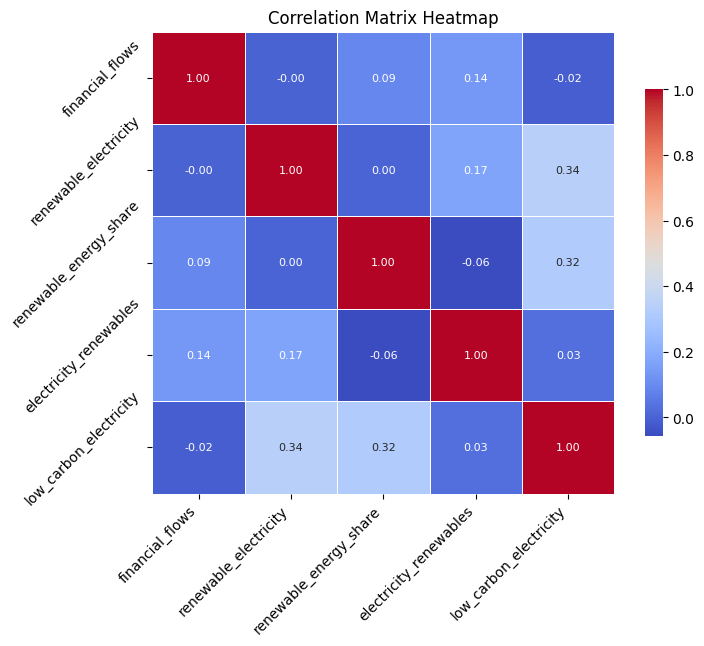

In [15]:
# Create a new DataFrame according to HeatMap needs
heatmap_df = df_filtered_final[["financial_flows", "renewable_electricity", "renewable_energy_share", "electricity_renewables", "low_carbon_electricity"]]

# Create a correlation matrix
correlation_matrix = heatmap_df.corr()

# Set the Chart size
plt.figure(figsize=(8, 6))

# Display the correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Insight**

From the HeatMap above, we can see that financial aid from developed countries to developing countries has no impact on the development of clean energy. both in terms of renewable electricity (tools to produce renewable energy), renewable energy share (renewable energy produced from energy consumption), electricity renewables (electricity produced from renewable energy), and low carbon electricity (electricity produced from sources that have low carbon content (nuclear and renewable energy)).

**Q4. How has electricity access related to the welfare of the population in the country in question in the last 5 years?**

In [16]:
# Gives an upper limit of the column for data visualization purposes
df_filtered_years_threshold = df_filtered_years[(df_filtered_years['access_electricity'] < 100.00) &
                                      (df_filtered_years['gdp_per_capita'] < 20000)]

Text(0, 0.5, 'access_electricity')

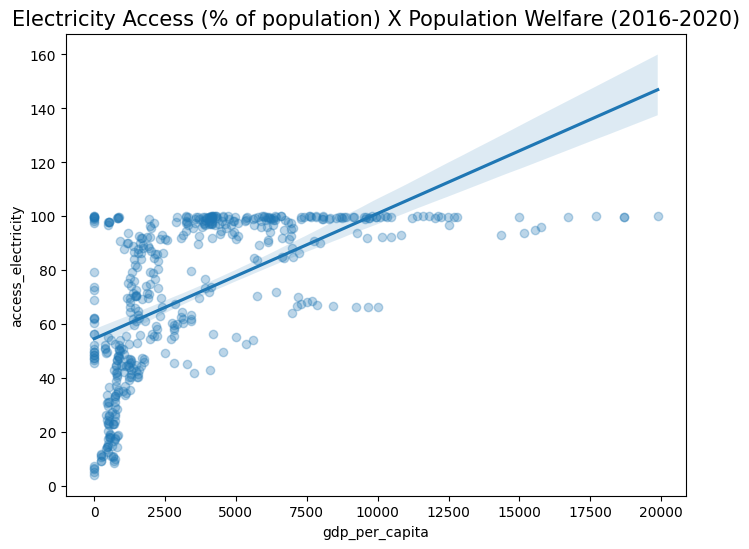

In [17]:
# Set the chart size
plt.figure(figsize=(8,6))

# Create X and Y axis labels, then enter the dataframe you want to use for visualization
sns.regplot(x='gdp_per_capita', y='access_electricity', data=df_filtered_years_threshold, scatter_kws={'alpha':0.3})

# Create a visualization of the chart
plt.title('Electricity Access (% of population) X Population Welfare (2016-2020)', size=15)
plt.xlabel('gdp_per_capita')
plt.ylabel('access_electricity')

**Insight**

Based on the Scatter Plot above, we can see that access to electricity has a significant impact on the welfare of the population of countries in the world. As the population of a country that can access electricity increases, the country's GDP per capita also increases.

**Q5. Is there a difference between clean energy production from developed countries and clean energy production from developing countries in the last 5 years?**

Hypothesis

H0: There is no difference between clean energy production from developed countries and clean energy production from developing countries

H1: There is a significant difference between clean energy production from developed countries and clean energy production from developing countries

In [18]:
# Create a new DataFrame with columns that have 2 different categories
country_developing = ['Developing Country']
country_developed = ['Developed Country']
df_filtered_developing = df_filtered_years[df_filtered_years['country_classification'].isin(country_developing)]
df_filtered_developed = df_filtered_years[df_filtered_years['country_classification'].isin(country_developed)]

# Create groupings for analysis purposes
groupA = df_filtered_developing['electricity_renewables']
groupB = df_filtered_developed['electricity_renewables']

In [19]:
# Performing normality test
normality_test = shapiro(df_filtered_years['electricity_renewables'])[1]
normality_test = normality_test < 0.05
print(normality_test)

True


In [20]:
# Perform homogeneity of variance test
homogenity_test = stats.levene(groupA, groupB)[1]
homogenity_test = homogenity_test < 0.05
print(homogenity_test)

True


In [21]:
# Hypothesis Testing with homogeneity of variance
ttest ,p_val = stats.ttest_ind(groupA, groupB, equal_var=True)
print (ttest ,p_val)

-2.1331094526985046 0.033194070039275686


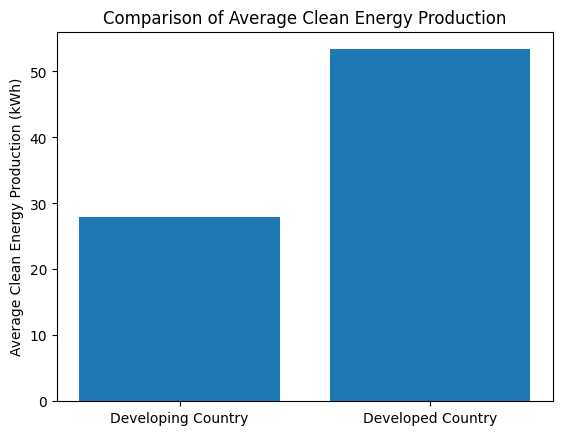

In [23]:
mean_developing = df_filtered_developing['electricity_renewables'].mean()
mean_developed = df_filtered_developed['electricity_renewables'].mean()

categories = ['Developing Country', 'Developed Country']
means = [mean_developing, mean_developed]

plt.bar(categories, means)
plt.title('Comparison of Average Clean Energy Production')
plt.ylabel('Average Clean Energy Production (kWh)')
plt.show()

**Insight**

The p_value < 0.05, which means H0 is rejected and H1 is accepted

H1: There is a significant difference between clean energy production from developed countries and clean energy production from developing countries

Based on the bar chart above, developed countries have an average of more clean production than developing countries. With a fairly large comparison

# iv. Conclusion

From the analysis above, the following conclusions can be drawn:

The majority of countries in the world are still very dependent on the production of electricity using fossil fuels, both developed and developing countries, which has resulted in global CO2 emissions continuing to increase over time (except in 2020 when the Covid outbreak hit the world). Developed countries should continue to increase the production of renewable energy-producing electricity-producing sectors, while developing countries should be able to allocate aid funds from developed countries wisely and on target (for the development of renewable energy-powered electricity). Access to electricity to each region in the country concerned must also be increased. Because according to the data, the amount of electricity access in a country has a significant impact on the growth of the welfare of the country's population (GDP per capita).

External source of data :

World CO2 emissions are increasing every year : https://www.dw.com/id/cop29-global-carbon-emissions-reach-record-highest-in-2024/a-70774083#:~:text=With%20more%20than%2040%20billion,driving%20dangerous%20global%20warming.